In [86]:
import numpy as np
import pandas as pd

from scipy import stats

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Исчерпанная рождаемость - количество детей, 
#родившихся на момент окончания конвенционального репродуктивного возраста у женищиен (45 лет)
#В Швецарии, для 1878 женщин старше 45 лет, прошедших опрос, известно кол-во детей.
#Этот признак - типичный счётчик, значит можно попробовать описать его распределение Пуассона

In [5]:
# 1. Выборка - целочисленный векор - кол-во детей у опрошенных женщин
# 2. Гипотиза Ho - рассматриаемая величина имеет распределение Пуассона

In [43]:
fin = open('fertility.txt', 'r')

In [44]:
data = map(lambda x: int(x.strip()), fin.readlines())

In [45]:
data[:20]

[0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 3, 2, 2, 4]

In [50]:
np.max(data)

11

<BarContainer object of 12 artists>

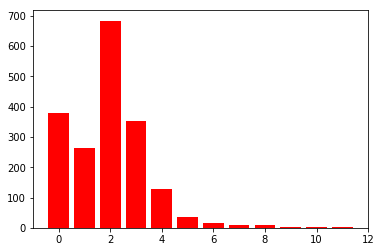

In [51]:
pylab.bar(range(12), np.bincount(data), color = 'r', label = 'fertility_stat')

In [53]:
l = np.mean(data)
print(l)

1.93716719914803


The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [2]:
data = pd.read_csv('pines.txt', sep = "\\t")

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [275]:
len(data) / 5.

116.8

In [8]:
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [9]:
data.columns = ['sn', 'we']

In [11]:
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [12]:
x = data.sn.values

In [14]:
x[0]

200.0

In [15]:
y = data.we.values

In [16]:
y[0]

8.8

KeyboardInterrupt: 

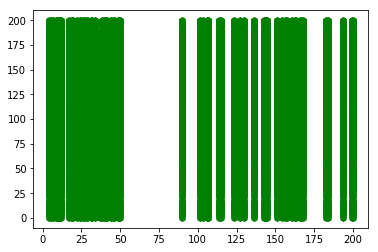

In [34]:
for i in x:
    for ii in y:
        pyplot.plot(i,ii,'hg')

In [82]:
len(x)

584

In [83]:
len(y)

584

In [84]:
x1 = []
for i in x:
    if i <= 40.:
        x1.append(i)

x2 = []
for i in x:
    if i > 40.:
        if i<=80.:
            x2.append(i) 
    
x3 = []
for i in x:
    if i > 80.:
        if i <=120.:
            x3.append(i) 

x4 = []
for i in x:
    if i > 120.:
        if i<=160.:
            x4.append(i) 
        
x5 = []
for i in x:
    if i > 160.:
        x5.append(i)         

In [85]:
print len(x1), len(x2), len(x3), len(x4), len(x5),
len(x1)+len(x2)+len(x4)+len(x5)

118 107 138 116 105

446

In [195]:
arange(0., 240., 40)

array([  0.,  40.,  80., 120., 160., 200.])

In [187]:
binsx = [0.0,  40.,  80., 120., 160., 200.]
binsy = [0.0,  40.,  80., 120., 160., 200.]

In [196]:
ret = stats.binned_statistic_2d(x, y, None, 'count', bins=[arange(0., 240., 40),arange(0., 240., 40)])

In [197]:
ret.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [198]:
ret.statistic[1]

array([14., 12., 22., 34., 25.])

In [202]:
observed_frequences = np.concatenate((ret.statistic[0], ret.statistic[1], 
                                      ret.statistic[2], ret.statistic[3], 
                                      ret.statistic[4]), axis=0)

In [203]:
observed_frequences

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

In [206]:
Z = stats.chisquare(observed_frequences, ddof = 0)
Z

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [207]:
round(Z[0], 2)

150.59

In [208]:
sum(ret.statistic[0])

118.0

In [209]:
sum(ret.statistic[1])

107.0

In [210]:
sum(ret.statistic[2])

138.0

In [211]:
sum(ret.statistic[3])

115.0

In [212]:
sum(ret.statistic[4])

106.0

In [221]:
p0 = sum(ret.statistic[0]) / 584
p0

0.20205479452054795

In [222]:
p1 = sum(ret.statistic[1]) / 584
p1

0.1832191780821918

In [223]:
p2 = sum(ret.statistic[2]) / 584
p2

0.2363013698630137

In [225]:
p3 = sum(ret.statistic[3]) / 584
p3

0.1969178082191781

In [226]:
p4 = sum(ret.statistic[4]) / 584
p4

0.1815068493150685

In [228]:
sum(ret.statistic[0])*p0 + sum(ret.statistic[1])*p1 + sum(ret.statistic[2])*p2 + sum(ret.statistic[3])*p3 + sum(ret.statistic[4])*p4

117.9417808219178

In [230]:
print ret.statistic[0], ret.statistic[1], ret.statistic[2], ret.statistic[3], ret.statistic[4]

[18. 26. 29. 25. 20.] [14. 12. 22. 34. 25.] [12. 24. 15. 50. 37.] [ 8. 19. 31. 50.  7.] [ 7.  8. 37. 27. 27.]


In [248]:
print ret.statistic[0][0]*(ret.statistic[0][0]/sum(ret.statistic[0]))

2.745762711864407


In [261]:
o1 = []
for i in ret.statistic[0]:
    o1.append(i * (i/sum(ret.statistic[0])))
print sum(o1)

24.28813559322034


In [262]:
o2 = []
for i in ret.statistic[1]:
    o2.append(i * (i/sum(ret.statistic[1])))
print sum(o2)

24.345794392523366


In [263]:
o3 = []
for i in ret.statistic[2]:
    o3.append(i * (i/sum(ret.statistic[2])))
print sum(o3)

34.8840579710145


In [264]:
o4 = []
for i in ret.statistic[3]:
    o4.append(i * (i/sum(ret.statistic[3])))
print sum(o4)

34.21739130434782


In [265]:
o5 = []
for i in ret.statistic[4]:
    o5.append(i * (i/sum(ret.statistic[4])))
print sum(o5)

27.735849056603772


In [270]:
(sum(o1)+sum(o2)+sum(o3)+sum(o4)+sum(o5))/5

29.09424566354196